# Introduction

Following is a description of the dataset on the [Kaggle page](https://www.kaggle.com/mashlyn/online-retail-ii-uci).

*This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.*

**Attribute Information:**

- `InvoiceNo`: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- `StockCode`: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- `Description`: Product (item) name. Nominal.
- `Quantity`: The quantities of each product (item) per transaction. Numeric.
- `InvoiceDate`: Invice date and time. Numeric. The day and time when a transaction was generated.
- `UnitPrice`: Unit price. Numeric. Product price per unit in sterling (Â£).
- `CustomerID`: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- `Country`: Country name. Nominal. The name of the country where a customer resides.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

# Data Preparation

There are 1,067,371 records with eight columns. There are null values on the `Description` and `Customer ID` columns.

In [2]:
df_raw = pd.read_csv("online_retail_II.csv")
df_raw.shape

(1067371, 8)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Before performing further analysis, we should determine the correct data type of the columns. For instance, `Customer ID` shouldn't be treated as numeric values.

We also create a new column called `subtotal`, which is the multiplication of `Quantity` and the unit price (`Price`).

In [4]:
df_raw['Customer ID'] = df_raw['Customer ID'].astype(str).apply(lambda x: x.split('.')[0])
df_raw['InvoiceDate'] = pd.to_datetime(df_raw['InvoiceDate'])
df_raw['subtotal'] = df_raw['Quantity'] * df_raw['Price']

Each record stores a pair of Invoice ID and a purchased item. Thus, there could be multiple records for one invoice.

In [5]:
df_raw.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,subtotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


# Exploratory Analysis

The dataset is not clean; we have negative values in `Quantity` and `Price`.

In [6]:
df_raw.describe()

,Quantity,Price,subtotal
count,1.067371e+06,1.067371e+06,1.067371e+06
mean,9.938898e+00,4.649388e+00,1.806987e+01
std,1.727058e+02,1.235531e+02,2.924202e+02
min,-8.099500e+04,-5.359436e+04,-1.684696e+05
25%,1.000000e+00,1.250000e+00,3.750000e+00
50%,3.000000e+00,2.100000e+00,9.900000e+00
75%,1.000000e+01,4.150000e+00,1.770000e+01
max,8.099500e+04,3.897000e+04,1.684696e+05


## Sales Volume

> Assumption: **sales volume = quantity**

The daily sales volume plot shows a fluctuation in the sales, which could be attributed to daily seasonality. On the weekly plot, we observe a sales decline in January (both 2010 and 2011). The 2011's January decline is steeper than 2010's.

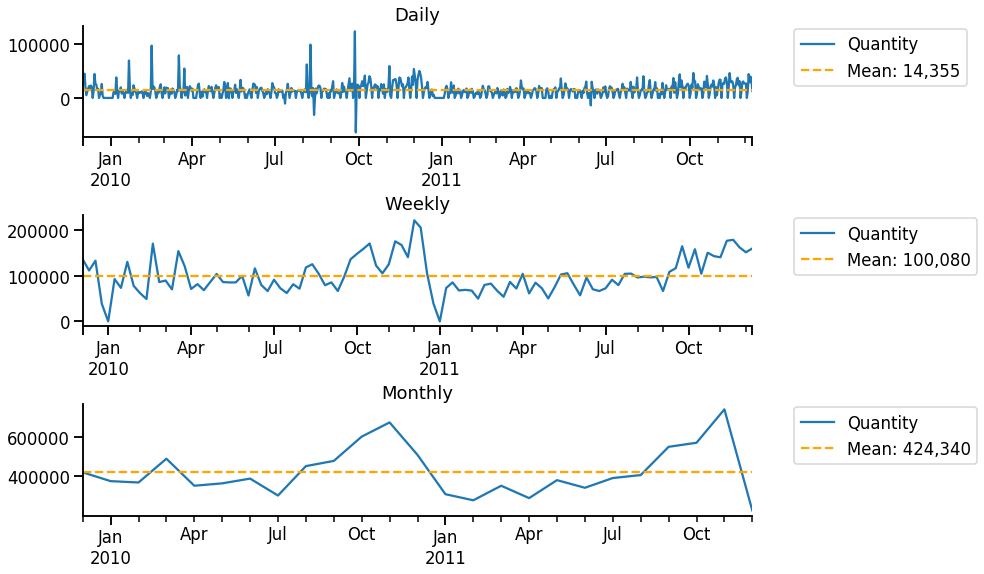

In [60]:
f, ax = plt.subplots(figsize = (12, 9), nrows = 3)
plt.subplots_adjust(hspace = .7)

sales_volume_col = 'Quantity'
titles = ['Daily','Weekly','Monthly']
for i, grp in enumerate(['1D','1W','1M']):
    _agg = df_raw.groupby([
        pd.Grouper(key = 'InvoiceDate', freq = grp)
    ]).agg({sales_volume_col: 'sum'})
    
    _agg.plot(ax = ax[i]);
    ax[i].axhline(_agg[sales_volume_col].mean(), 
                  linestyle = 'dashed',
                  label = 'Mean: {:,.0f}'.format(_agg[sales_volume_col].mean()),
                  color = 'orange');
    
    ax[i].set_xlabel('');
    ax[i].set_title(titles[i]);
    ax[i].legend(bbox_to_anchor = [1.05, 1.05]);
    
sns.despine();
plt.show();

## Last Month's Revenue Share by Product and Customer

> Assumption: **last month = full days of November 2011**

## Weighted Average Monthly Sales Price by Volume

> Assumption: **...**

## Invoice-level Assessment

We may be interested to see the amount of sales, quantity, and number of items per invoice.

In [43]:
df_agg_invoice = df_raw.groupby('Invoice').agg({
    'StockCode': 'nunique',
    'Quantity': 'sum',
    'subtotal': 'sum'
}).reset_index()

In [53]:
df_agg_invoice.describe()

,StockCode,Quantity,subtotal
count,53628.000000,53628.000000,53628.000000
mean,19.046468,197.816290,359.648888
std,37.844450,1234.716062,1654.829288
min,1.000000,-87167.000000,-168469.600000
25%,1.000000,2.000000,0.000000
50%,9.000000,93.000000,196.345000
75%,22.000000,233.000000,403.652500
max,1110.000000,87167.000000,168469.600000


We find a right-skewed distribution on the number of item types (`StockCode`). 50% of the invoice contain $\geq 9$ item type, and one invoice contains 1,110 item types!

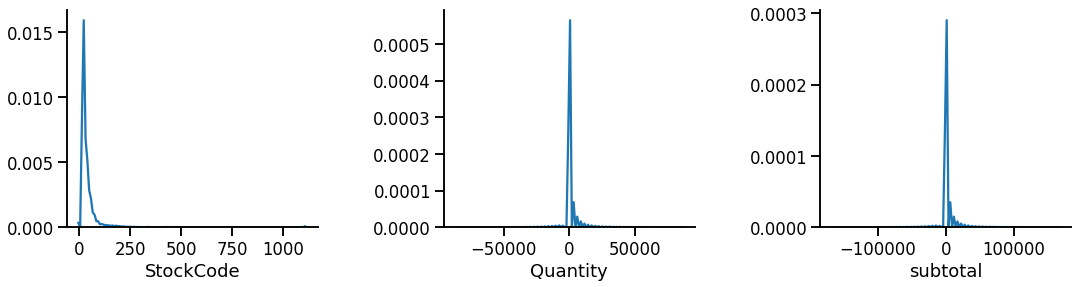

In [52]:
cols = ['StockCode','Quantity','subtotal']

f, ax = plt.subplots(figsize = (18,4), ncols = 3)
plt.subplots_adjust(wspace = .5)

for i, col in enumerate(cols):
    sns.distplot(
        df_agg_invoice[col],
        hist = False,
        ax = ax[i]
    )
    ax[i].set_xlabel(col)
    

sns.despine()
plt.show();

In [56]:
df_agg_invoice.loc[np.argmax(df_agg_invoice['StockCode'])]

Invoice       573585
StockCode       1110
Quantity        5198
subtotal     16874.6
Name: 41410, dtype: object

# Data Cleaning

Handle negative values on sales returns.

# Situation Assessment

The owner of the online retailer wants to know how much revenue to expect for this month (12/2011), to help him decide what sports car he buys his partner for Christmas.

Price in this dataset is in poundsterling. A new Ferrari costs around $350,000 ~ £264,690.

## Proposed Solutions

### 1. xxx

...

### 2. xxx

...

### 3. xxx

...

## Suggested Solution

Reasoning ...

## Implementation: solution no X

We use solution no X because ...

## Conclusion

Should the retail owner buy a new Ferrari?